In [1]:
import numpy as np

In [2]:
import scipy as sp

In [3]:
import matplotlib.pyplot as plt

In [5]:
day = 60*60*24
# Constants
G = 6.67408e-11
au = 1.496e11

class CelBody(object):
    # Constants of nature
    # Universal constant of gravitation
    def __init__(self, id, name, x0, v0, mass, color, lw):
        # Name of the body (string)
        self.id = id
        self.name = name
        # Mass of the body (kg)
        self.M = mass
        # Initial position of the body (au)
        self.x0 = np.asarray(x0, dtype=float)
        # Position (au). Set to initial value.
        self.x = self.x0.copy()
        # Initial velocity of the body (au/s)
        self.v0 = np.asarray(v0, dtype=float)
        # Velocity (au/s). Set to initial value.
        self.v = self.v0.copy()
        self.a = np.zeros([3], dtype=float)
        self.color = color
        self.lw = lw

In [17]:
# All Celestial Bodies

t = 0
dt = 0.1*day

Bodies = [
    CelBody(0, 'Sun', [0, 0, 0], [0, 0, 0], 1.989e30, 'yellow', 10),
    CelBody(1, 'Earth', [-1*au, 0, 0], [0, 29783, 0], 5.9742e24, 'blue', 3),
    #CelBody(2, 'Venus', [0, 0.723 * au, 0], [ 35020, 0, 0], 4.8685e24, 'red', 2),
    CelBody(2, 'Venus', [0, 0.723 * au, 0], [ 0, 0, 0], 0, 'red', 2)
    ]

paths = [ [ b.x[:2].copy() ] for b in Bodies]

# loop over ten astronomical years
v = 0
while t < 10*365.242*day:
    # compute forces/accelerations
    for body in Bodies:
        body.a *= 0
        for other in Bodies:
            # no force on itself
            if (body == other): continue # jump to next loop
            rx = body.x - other.x
            r3 = sum(rx**2)**1.5
            body.a += -G*other.M*rx/r3

    for n, planet in enumerate(Bodies):
        # use the symplectic Euler method for better conservation of the constants of motion
        planet.v += planet.a*dt
        planet.x += planet.v*dt
        paths[n].append( planet.x[:2].copy() )
        #print("%10s x:%53s v:%53s"%(planet.name,planet.x, planet.v))
    if t > v:
#        print("t=%f"%t)
 #       for b in Bodies: print("%10s %s"%(b.name,b.x))
        v += 30.5*day
    t += dt

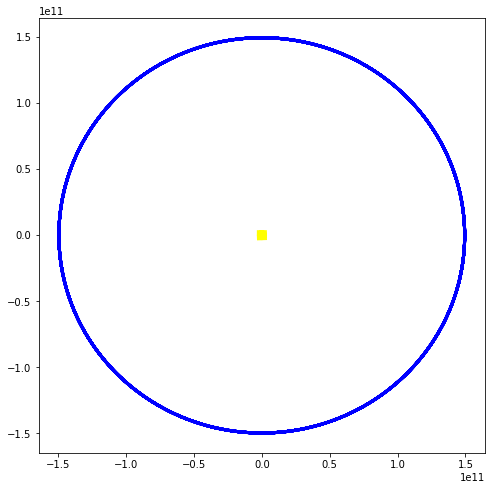

In [18]:
plt.figure(figsize=(8,8))
for n, planet in enumerate(Bodies[:2]): 
    px, py=np.array(paths[n]).T; 
    plt.plot(px, py, color=planet.color, lw=planet.lw)
plt.show()

# mio

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
params = {
   'axes.labelsize': 12,
   'font.size': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'figure.figsize': [4.5, 4.5]
   }
plt.rcParams.update(params)

In [12]:
plt.rcParams.update(plt.rcParamsDefault)

In [5]:
class SolSystem:
    """
    Differential equations numerical solution by Euler's Method and RK4
    SolSystem(time,steps,function)
    
    """
    def __init__(self,time,N,funcion):
        self.time = time
        self.N = N 
        self.h = (1.*time)/N 
        self.h2 = self.h/2.
        self.h6 = self.h/6.
        self.funcion = funcion

    def euler_step(self,x0):
        """
        Euler step
        """
        return x0+self.funcion(x0)*self.h
    
    def rk4_step(self,x0):
        """
        RK4 step
        """
        k1 = self.funcion(x0)
        k2 = self.funcion(x0 + self.h2*k1)
        k3 = self.funcion(x0 + self.h2*k2)
        k4 = self.funcion(x0 + self.h*k3)
        return x0 + self.h6*(k1 + 2.*k2 + 2.*k3 +k4)
  
    
    def trajectory(self,x0,method='euler'):
        """
        Solution
        trajectory(initial point, solution method)
        solution metod 'euler', 'rk4'
        """
        if method == 'euler':
            step = self.euler_step
        if method == 'rk4':
            step = self.rk4_step
        x0 = np.array(x0)
        traject = np.empty((self.N,x0.size))
        self.time_s = np.empty(self.N)
        traject[0] = x0
        self.time_s[0] = 0 
        for i in range(self.N-1):
            traject[i+1] = step(traject[i])
            self.time_s[i+1] = (i+1)*self.h  
        return traject

    def time_steps(self):
        """
        Return the time steps
        """
        return self.time_s

In [122]:
class TwoBody:
    def __init__(self,m1,m2,G,K):
        self.m1 = m1
        self.m2 = m2
        self.G = G
        self.K = K
    def __call__(self,X):
        del_x = X[2]-X[0] 
        del_y = X[3]-X[1]
        cons = self.G / ((del_x**2 + del_y**2)**(1.5))
        x1 = X[4]
        y1 = X[5]
        x2 = X[6]
        y2 = X[7]
        v_1x = cons*self.m2*del_x - (self.K/self.m1) 
        v_1y = cons*self.m2*del_y
        v_2x = -cons*self.m1*del_x - (self.K/self.m2)
        v_2y = -cons*self.m1*del_y
        return np.r_[x1,y1,x2,y2,v_1x,v_1y,v_2x,v_2y]

In [161]:
#Fuerza de jupiter
# masa 1.8982e27 kg
# semieje 778.57e9 m 
# ((6.6743e-11)*(3.3011e23)*(1.8982e27))/((778.57e9)**2)
# K = 6.8994e16 N

# mecurio masa 3.3011e23 kg
# mecurio semiejemayor 57.91e9 m
# Sol masa 1.9885e30 kg
# G 6.6743e-11
# Velocidad inicial de mercurio 47362 m/s
# Velocidad inicial del Sol 0 km/s
# segundos qu etiene un año 31536000
# numero de pasos 1000
# tamaño de paso 31536
FR = TwoBody(3.3011e23,1.9885e30,6.6743e-11,6.8994e16)
#FR = TwoBody(3.3011e23,1.9885e30,6.6743e-11,0)
t_total, N_iter = 315360000,10000
h_ = (1.*t_total/N_iter)
lorenzo = SolSystem(t_total,N_iter,FR)
#p0 = np.r_[57.91e9,0.,0.,0.,0.,0.,0.,0.]
p0 = np.r_[-57.91e9,0.,0.,0.,0.,47362.,0.,0.]
trajectoria = lorenzo.trajectory(p0,method='euler')
series_t = lorenzo.time_steps()

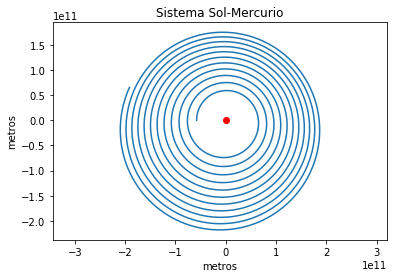

In [167]:
plt.plot(trajectoria[:,0],trajectoria[:,1])
plt.plot(trajectoria[:,2],trajectoria[:,3],'r--')
plt.plot([0],[0],'ro')
plt.title('Sistema Sol-Mercurio')
plt.xlabel('metros')
plt.ylabel('metros')
plt.axis('equal')
plt.savefig('MercurioSol.pdf')

In [112]:
class TwoBody:
    def __init__(self,m1,m2,G,K):
        self.m1 = m1
        self.m2 = m2
        self.G = G
        self.K = K
    def __call__(self,X):
        del_x = X[2]-X[0] 
        del_y = X[3]-X[1]
        cons = self.G / ((del_x**2 + del_y**2)**(1.5))
        x1 = X[4]
        y1 = X[5]
        x2 = X[6]
        y2 = X[7]
        v_1x = cons*self.m2*del_x - (self.K/self.m1) 
        v_1y = cons*self.m2*del_y
        v_2x = -cons*self.m1*del_x - (self.K/self.m2)
        v_2y = -cons*self.m1*del_y
        #print(del_x,del_y,cons*self.m1*del_x,cons*self.m2*del_x)
        return np.r_[x1,y1,x2,y2,v_1x,v_1y,v_2x,v_2y]

In [118]:
FR = TwoBody(1.,1.,1.,0.)
t_total, N_iter = 30,30
h_ = (1.*t_total/N_iter)
lorenzo = SolSystem(t_total,N_iter,FR)
p0 = np.r_[-1.,0.,1.,0.,0.,0.,0.,0.]
trajectoria = lorenzo.trajectory(p0,method='euler')
series_t = lorenzo.time_steps()

In [119]:
for i in trajectoria:
    print(i)

[-1.  0.  1.  0.  0.  0.  0.  0.]
[-1.    0.    1.    0.    0.25  0.   -0.25  0.  ]
[-0.75  0.    0.75  0.    0.5   0.   -0.5   0.  ]
[-0.25        0.          0.25        0.          0.94444444  0.
 -0.94444444  0.        ]
[ 0.69444444  0.         -0.69444444  0.          4.94444444  0.
 -4.94444444  0.        ]
[ 5.63888889  0.         -5.63888889  0.          4.42604444  0.
 -4.42604444  0.        ]
[ 10.06493333   0.         -10.06493333   0.           4.41818208
   0.          -4.41818208   0.        ]
[ 14.48311542   0.         -14.48311542   0.           4.41571424
   0.          -4.41571424   0.        ]
[ 18.89882966   0.         -18.89882966   0.           4.4145224
   0.          -4.4145224    0.        ]
[ 23.31335206   0.         -23.31335206   0.           4.41382245
   0.          -4.41382245   0.        ]
[ 27.72717451   0.         -27.72717451   0.           4.41336248
   0.          -4.41336248   0.        ]
[ 32.14053698   0.         -32.14053698   0.           4.41

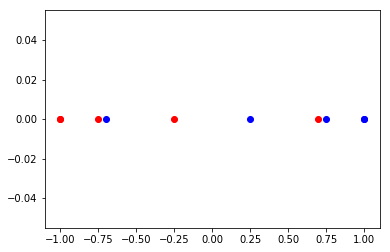

In [121]:
j= 5
plt.plot(trajectoria[:j,0],trajectoria[:j,1],'ro')
plt.plot(trajectoria[:j,2],trajectoria[:j,3],'bo')